<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_arvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas padrão 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
caminho = '/content/gdrive/MyDrive/Colab_Notebooks/FLAI/Rafinha dos dados/Classificação/Dados/dt.csv'
data = pd.read_csv(caminho)
data

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0
...,...,...,...,...
9995,39,2,0,0
9996,35,1,1,0
9997,36,1,1,1
9998,42,2,0,1


In [4]:
# Definindo variaveis preditivas e variavel resposta 
X = data.drop('Exited', axis = 1)
y = data['Exited']

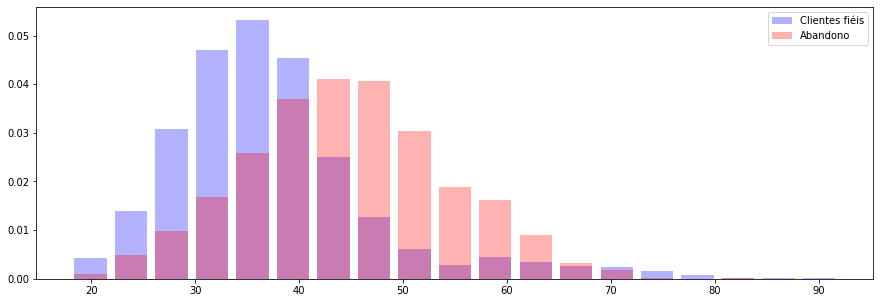

In [10]:
#Análises preliminares 
mi = X.Age.min()
ma = X.Age.max()

bins = np.linspace(mi,ma,20)


plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].Age, rwidth= 0.8 ,bins = bins,color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].Age,rwidth= 0.8 , bins = bins,color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

In [11]:
y.loc[X.Age >= 40].mean()

0.3588337901819088